# iFood Marketing analysis
- perform exploratory and statistical analysis to uncover actionable insights to help optimize the organizations marketing campaigns

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

#filter unneccesary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
df = pd.read_csv(r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0SL1EN/marketing_campaign.csv', sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## Objectives
- analyse the dataset to uncover insights that will make the next marketing campaign profitable

#### questions to ask
- is there a relationship between the campaign acceptance and the customers profiles(income, kidathome)
- is there a relationship between a customers purchasing characteristics and the acceptance to marketing campaings?
- is there a relationship between a customers profile and their purchasing characteristics

#### deliver insights both in graphs and visualizations
- pivot table summaries
- plot visualizations
- use streamlit for presentations 


## Data Wrangling and Analysis

In [3]:
# check for missing values, data type inconsistencies and shape
print('df shape\n', df.shape)
df.info()

df shape
 (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases

In [3]:
# fill null income values with median 
df['Income'] = df['Income'].fillna(df['Income'].median())

# drop duplicates
df.drop_duplicates()

# correct data type inconcistencies
df[['Marital_Status', 'Education']] = df[['Marital_Status', 'Education']].astype('category')

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

print('shape:\n', df.shape)
df.info()

shape:
 (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   category      
 3   Marital_Status       2240 non-null   category      
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProduc

In [4]:
# calculate new col for customer age at 2020 because the data was collected in 2020
df['Customer_age'] = 2020 - df.Year_Birth

# calculate customer enrollment by days using the Dt_customer column
current_day = pd.to_datetime('now')
time_diff = current_day - df['Dt_Customer']
df['Customer_days'] = time_diff.dt.days

# drop Year_Birth and Dt_customer columns
df.drop(columns=['Year_Birth','Dt_Customer'], inplace=True)
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_age,Customer_days
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,3,11,1,63,4718
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,3,11,0,66,4168
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,3,11,0,55,4367
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,3,11,0,36,4194
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,3,11,0,39,4216


In [5]:
df.nunique()

ID                     2240
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
Customer_age             59
Customer_days           663
dtype: int64

In [6]:
print(df.Education.unique())
print(df.Teenhome.unique())
print(df.Kidhome.unique())
print(df.Z_CostContact.unique())
print(df.Response.unique())

['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']
Categories (5, object): ['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']
[0 1 2]
[0 1 2]
[3]
[1 0]


In [7]:
num_cols = ['Customer_age', 'Customer_days','Income', 'Recency', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds','NumDealsPurchases',
'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
print(len(num_cols))
cols = [col for col in df.select_dtypes(exclude='category')]
len(cols)

15


27

In [ ]:
# plot boxplots for the columns using gca
for col in num_cols:
    fig = plt.figure(figsize=(6,4))
    axs= fig.gca()
    sns.boxplot(data=df, x=col)
    axs.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    axs.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
    axs.set_title(col)

plt.show()

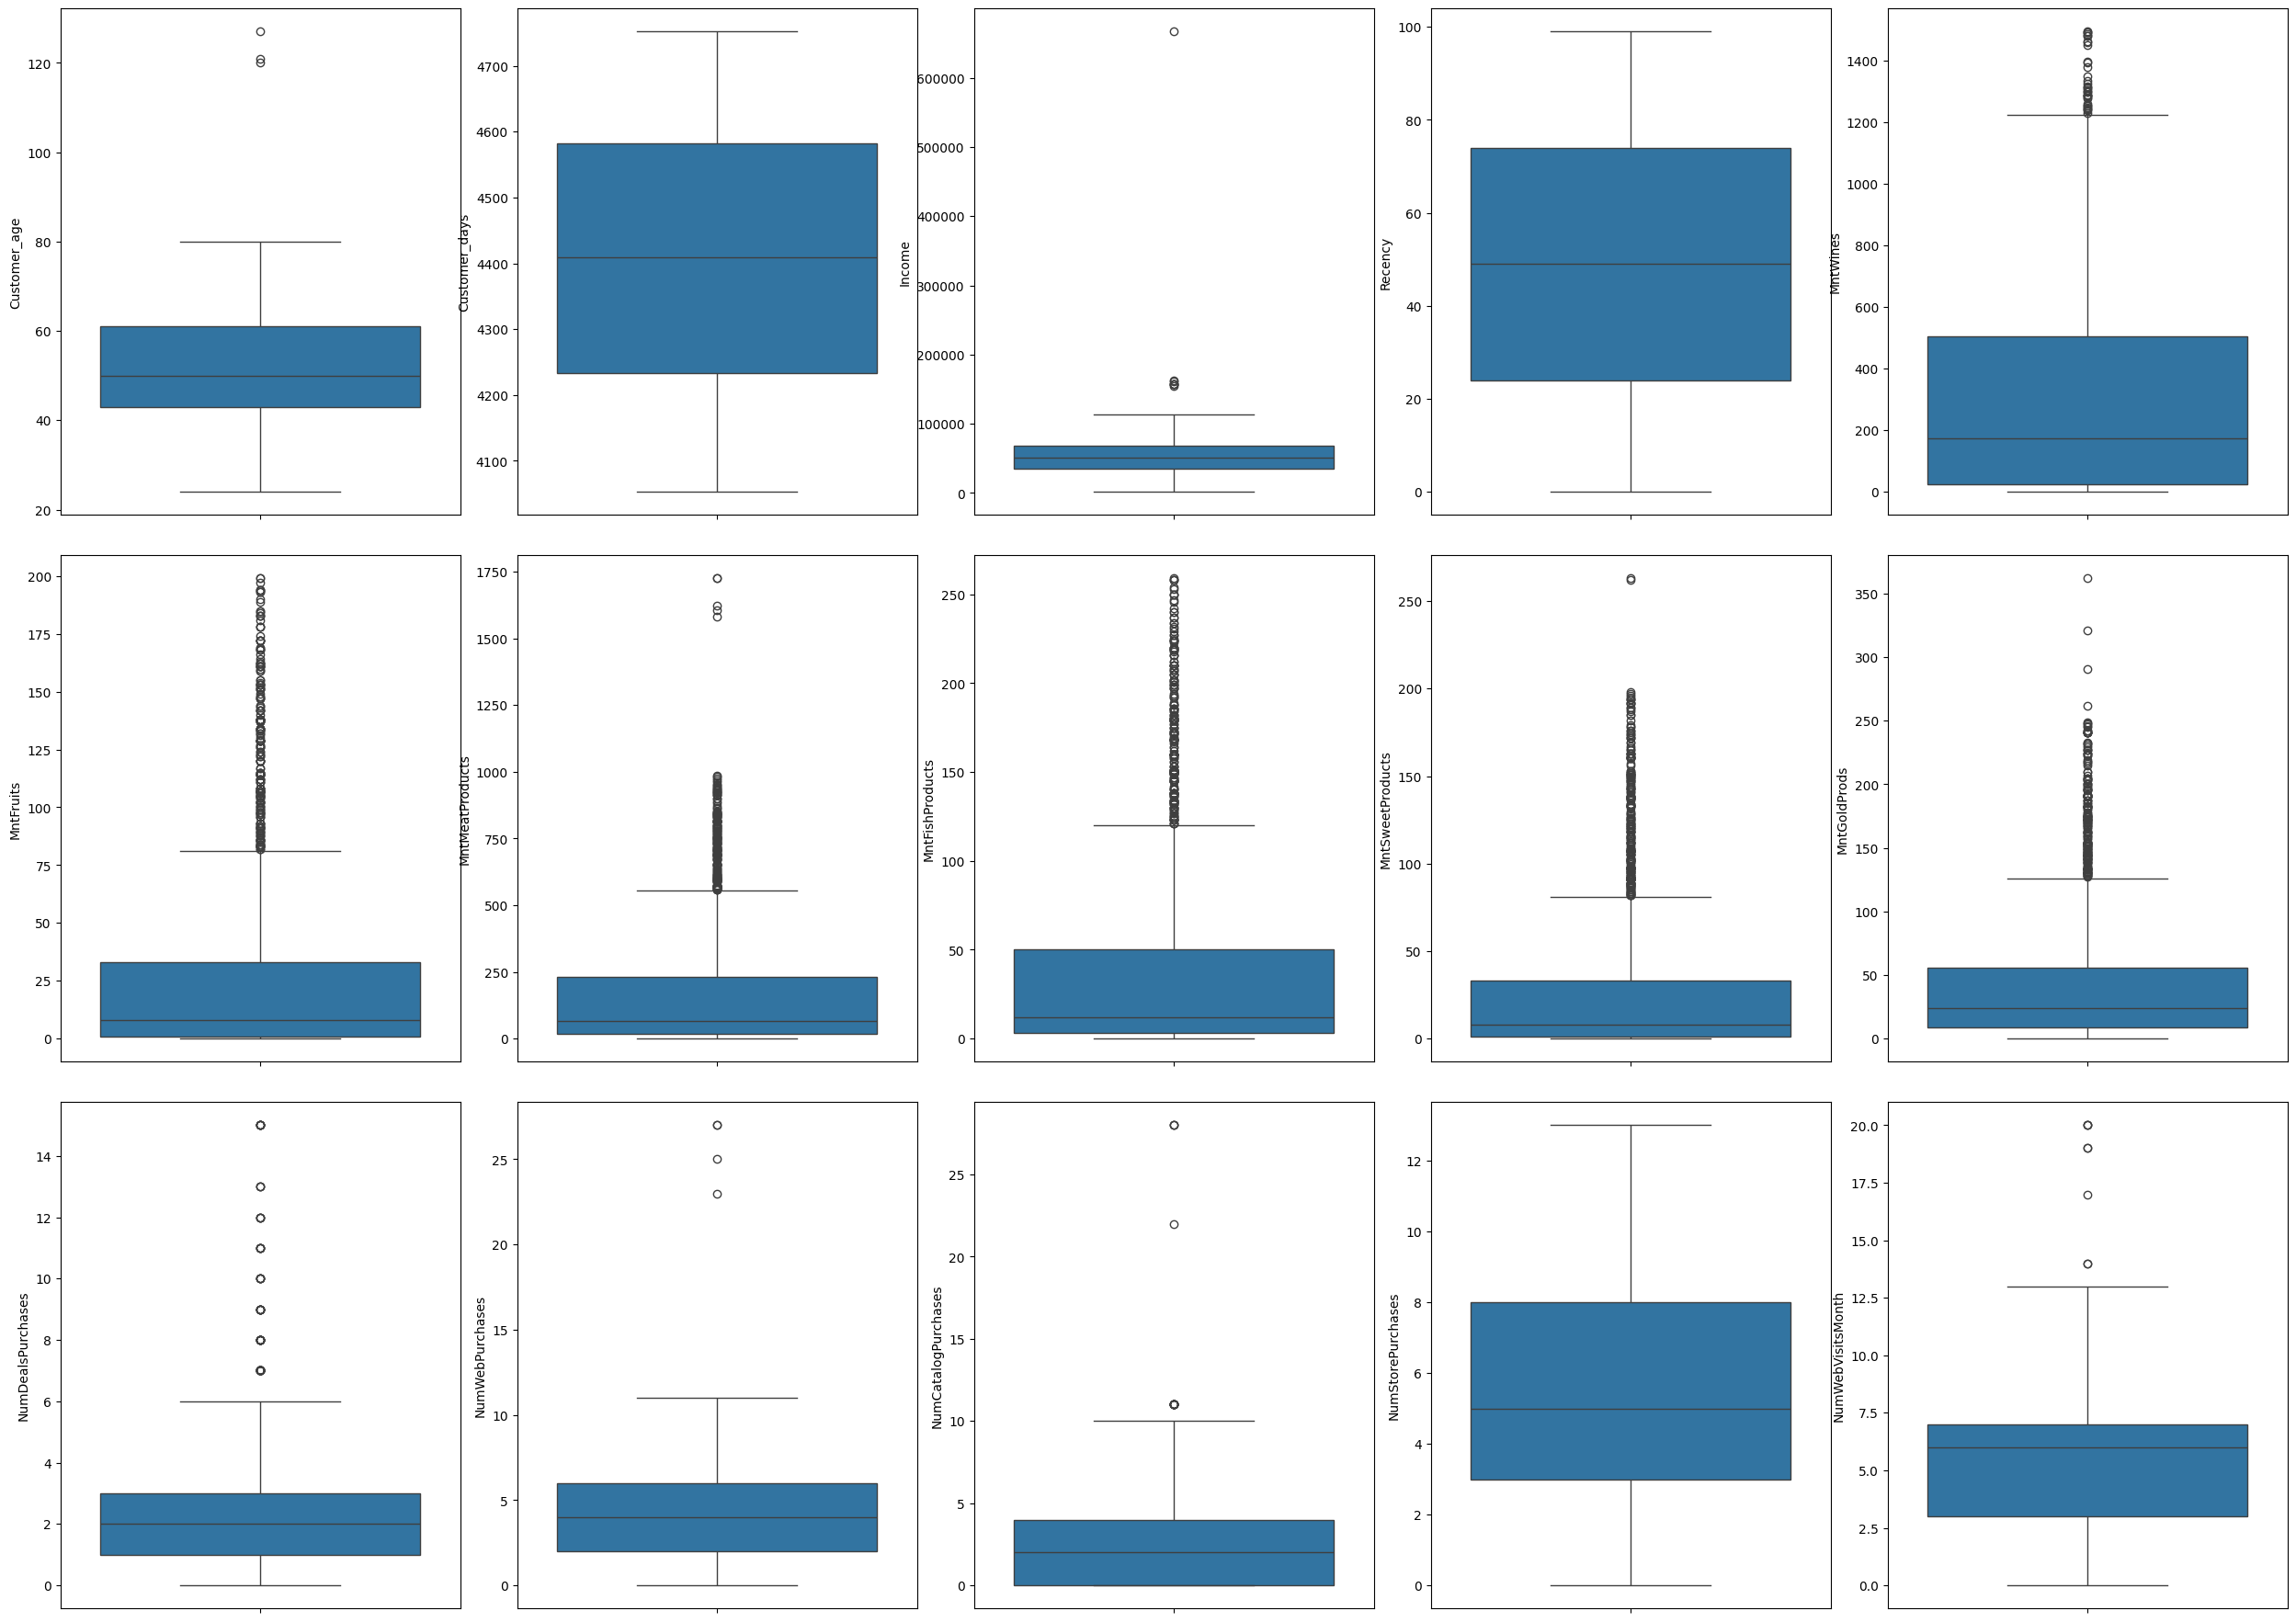

In [9]:
# Investigate outliers
# plot boxplots for each numerical column
def plot_boxplots(df):
    fig,axs = plt.subplots(3, 5, figsize=(25, 18))
    fig.subplots_adjust(wspace=1.5, hspace=0.7)
    axs = axs.flatten()
    plt.tight_layout()

    for index, col in enumerate(num_cols):
        if index < len(num_cols):
            sns.boxplot(df[col], ax=axs[index])
        else:
            break
    plt.show()

plot_boxplots(df)

new df shape:
 (2232, 29)


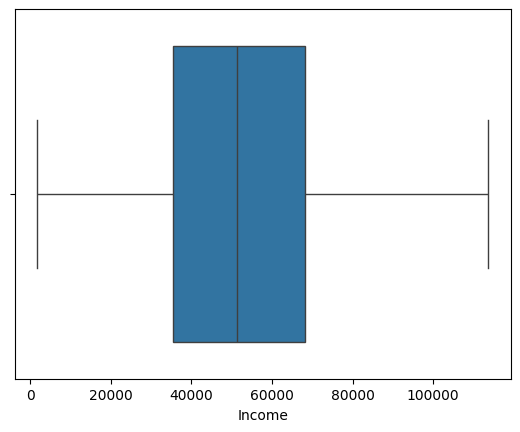

In [14]:
# remove outliers in the income column
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr 
upper_bound = q3 + 1.5*iqr

df = df[(df.Income >= lower_bound) & (df.Income <= upper_bound) ]
print('new df shape:\n', df.shape)
sns.boxplot(data=df, x= 'Income')
plt.show()

##### Outliers Report 
- The customer metadata columns i.e amounts used to purchase various categories of products have significant number of outliers but the information is crucial as it describes customer purchase habits.
- **Retain the other outliers** to remove them will be to remove significant information from the dataset

In [15]:
#drop the 'Z_CostContact', 'Z_Revenue' columns because they dont add much information to our analysis(they are constant for all records)
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# rearrange the columns 
start_cols= ['ID', 'Customer_age','Customer_days' ]
acceptance_cols = ['AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5','Complain', 'Response']
cols_re = start_cols + acceptance_cols
new_order  = start_cols + [col for col in df.columns if col not in cols_re ] + acceptance_cols

df = df.reindex(columns=new_order)
df.head()

,ID,Customer_age,Customer_days,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
0,5524,63,4718,Graduation,Single,58138.0,0,0,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,66,4168,Graduation,Single,46344.0,1,1,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,55,4367,Graduation,Together,71613.0,0,0,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,36,4194,Graduation,Together,26646.0,1,0,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,39,4216,PhD,Married,58293.0,1,0,94,173,...,3,6,5,0,0,0,0,0,0,0


In [16]:
#summary statistics
round(df.describe(),2 ).T

,count,mean,std,min,25%,50%,75%,max
ID,2232.0,5590.74,3246.39,0.0,2828.25,5458.5,8421.75,11191.0
Customer_age,2232.0,51.21,11.99,24.0,43.00,50.0,61.00,127.0
Customer_days,2232.0,4408.57,202.23,4055.0,4235.75,4410.0,4584.00,4754.0
Income,2232.0,51630.93,20601.68,1730.0,35434.75,51381.5,68118.00,113734.0
Kidhome,2232.0,0.44,0.54,0.0,0.00,0.0,1.00,2.0
Teenhome,2232.0,0.51,0.54,0.0,0.00,0.0,1.00,2.0
Recency,2232.0,49.11,28.95,0.0,24.00,49.0,74.00,99.0
MntWines,2232.0,304.93,336.78,0.0,24.00,176.0,505.00,1493.0
MntFruits,2232.0,26.38,39.82,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2232.0,165.32,219.40,0.0,16.00,67.0,231.25,1725.0


**Insights**
- On average customers spend the most amount on Wines followed by Meat products with the lowest amount spent on Fruits
- The number of Instore purchases recorded the highest average value 

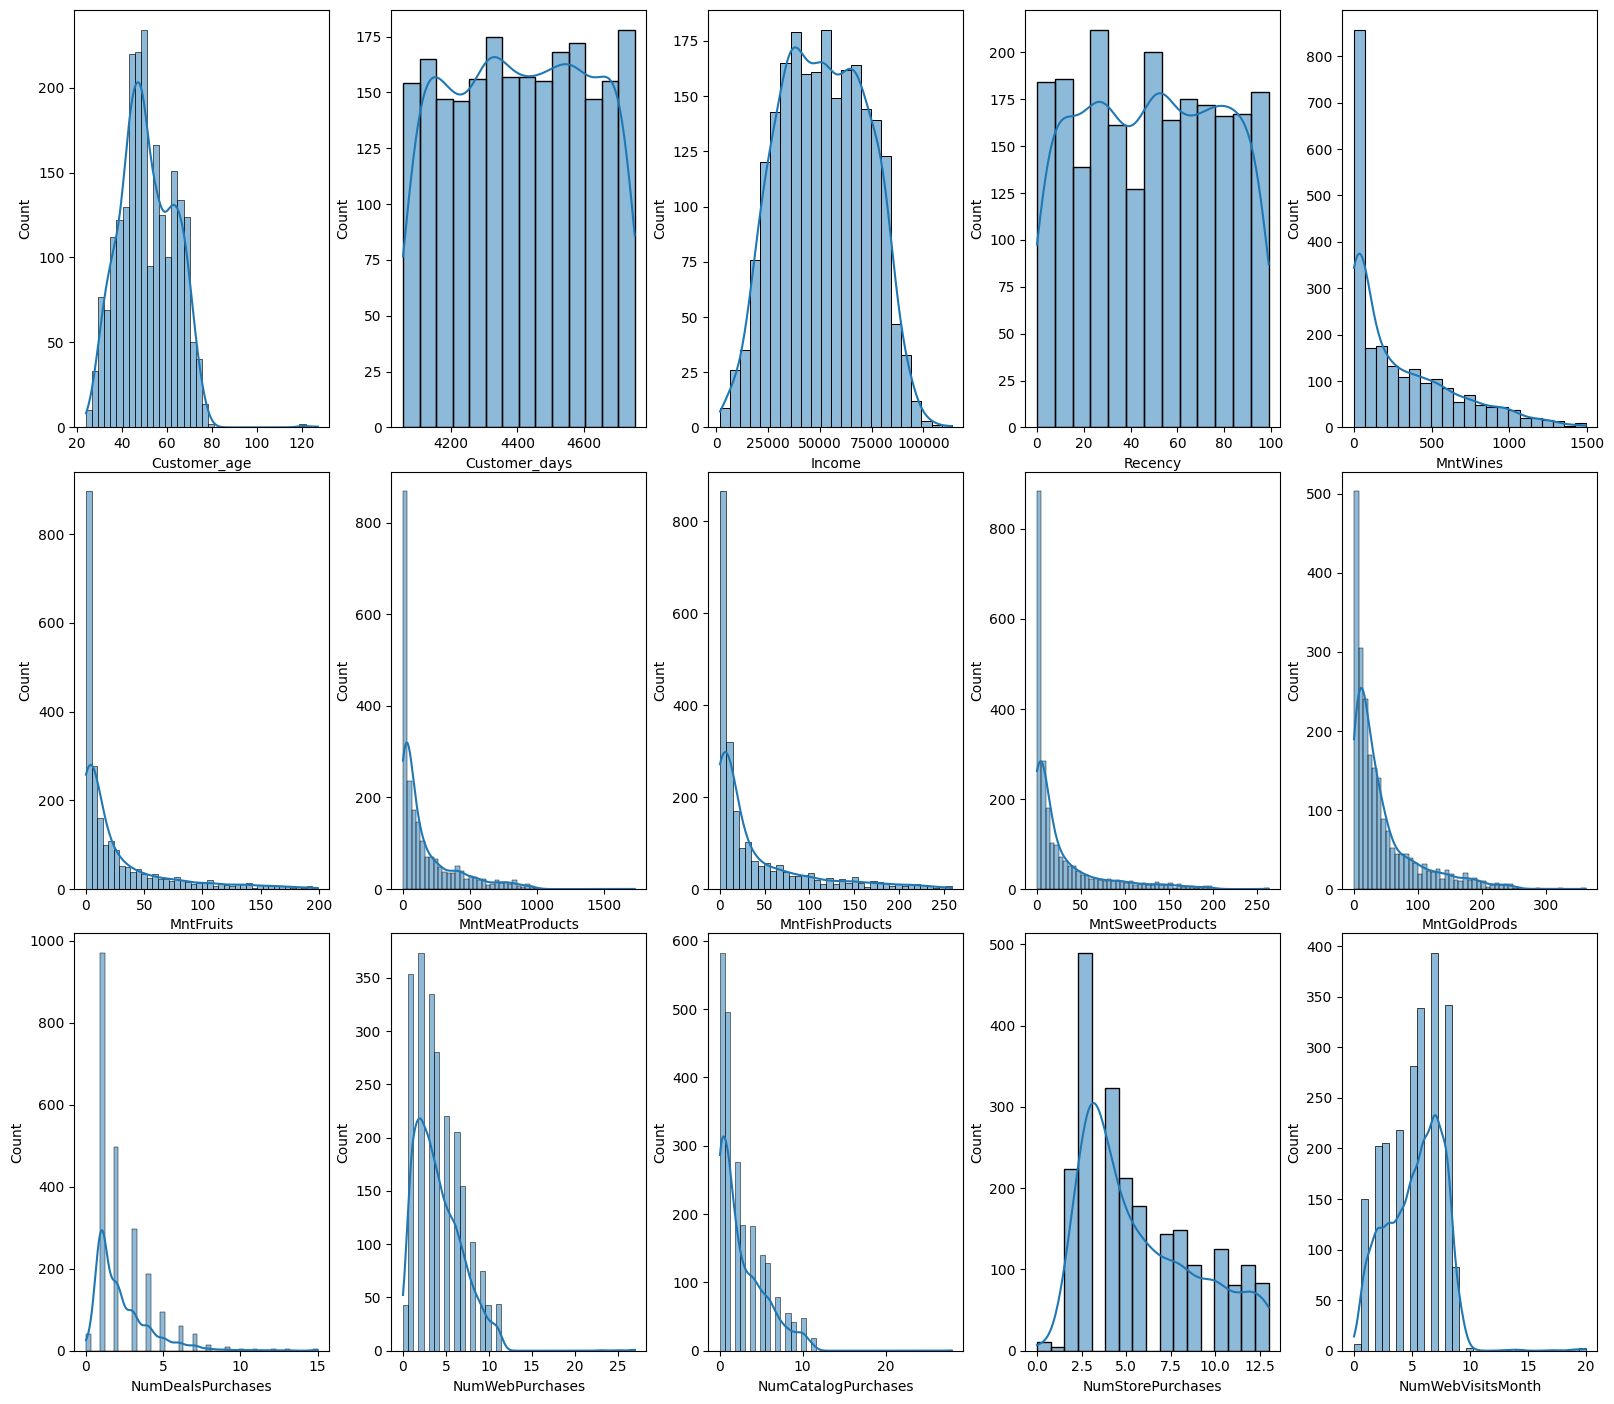

In [17]:
# investigate distribution for numerical columns non binary columns
dist_cols = ['Customer_age', 'Customer_days', 'Income','Recency', 'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

def plot_histograms(df, dist_cols):
    fig, axs = plt.subplots(3, 5, figsize=(16,14))
    axs = axs.flatten()
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.tight_layout()

    for index, col in enumerate(dist_cols):
        if index < len(dist_cols):
            sns.histplot(data=df, x=col, ax=axs[index],kde=True)
        else:
            break
plt.show()
plot_histograms(df, dist_cols)

**Insights** from the feature distributions
- The features describing the amount spent across the different product categories have right-skewed distributions which indicate the precense of extreme values to the right. 

    Majority of the customers are low amount purchasers but there are a few outlier customers spending large amounts across the product categories.
- Income across the age groups has a symmetrical distribution
- There is a uniform distribution for Recency and Customer days

### Investigating Correlations

In [18]:
# correlation between num cols exluding binary columns
exclude_cols = ['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Complain', 'Response']
num_cols1 = [col for col in df.select_dtypes(exclude='category') if col not in exclude_cols ]
corr = df[num_cols1].corr(method='spearman') # to capture non-linear relationships
corr = round(corr, 2)
corr

,Customer_age,Customer_days,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Customer_age,1.00,-0.02,0.22,-0.26,0.39,0.02,0.23,0.03,0.12,0.03,-0.00,0.08,0.09,0.16,0.18,0.17,-0.13
Customer_days,-0.02,1.00,-0.02,-0.05,0.02,0.03,0.15,0.13,0.16,0.13,0.12,0.23,0.22,0.20,0.12,0.11,0.30
Income,0.22,-0.02,1.00,-0.56,0.05,0.01,0.84,0.59,0.82,0.58,0.57,0.52,-0.19,0.59,0.80,0.75,-0.64
Kidhome,-0.26,-0.05,-0.56,1.00,-0.05,0.01,-0.58,-0.45,-0.55,-0.46,-0.44,-0.43,0.26,-0.43,-0.60,-0.56,0.48
Teenhome,0.39,0.02,0.05,-0.05,1.00,0.01,0.11,-0.20,-0.13,-0.23,-0.20,-0.02,0.48,0.14,-0.04,0.08,0.11
Recency,0.02,0.03,0.01,0.01,0.01,1.00,0.02,0.03,0.03,0.01,0.02,0.02,0.01,-0.00,0.03,0.01,-0.02
MntWines,0.23,0.15,0.84,-0.58,0.11,0.02,1.00,0.52,0.83,0.52,0.50,0.57,0.05,0.74,0.83,0.81,-0.40
MntFruits,0.03,0.13,0.59,-0.45,-0.20,0.03,0.52,1.00,0.72,0.70,0.69,0.57,-0.11,0.47,0.64,0.58,-0.45
MntMeatProducts,0.12,0.16,0.82,-0.55,-0.13,0.03,0.83,0.72,1.00,0.73,0.70,0.64,-0.04,0.68,0.85,0.79,-0.50
MntFishProducts,0.03,0.13,0.58,-0.46,-0.23,0.01,0.52,0.70,0.73,1.00,0.70,0.56,-0.12,0.46,0.66,0.58,-0.47


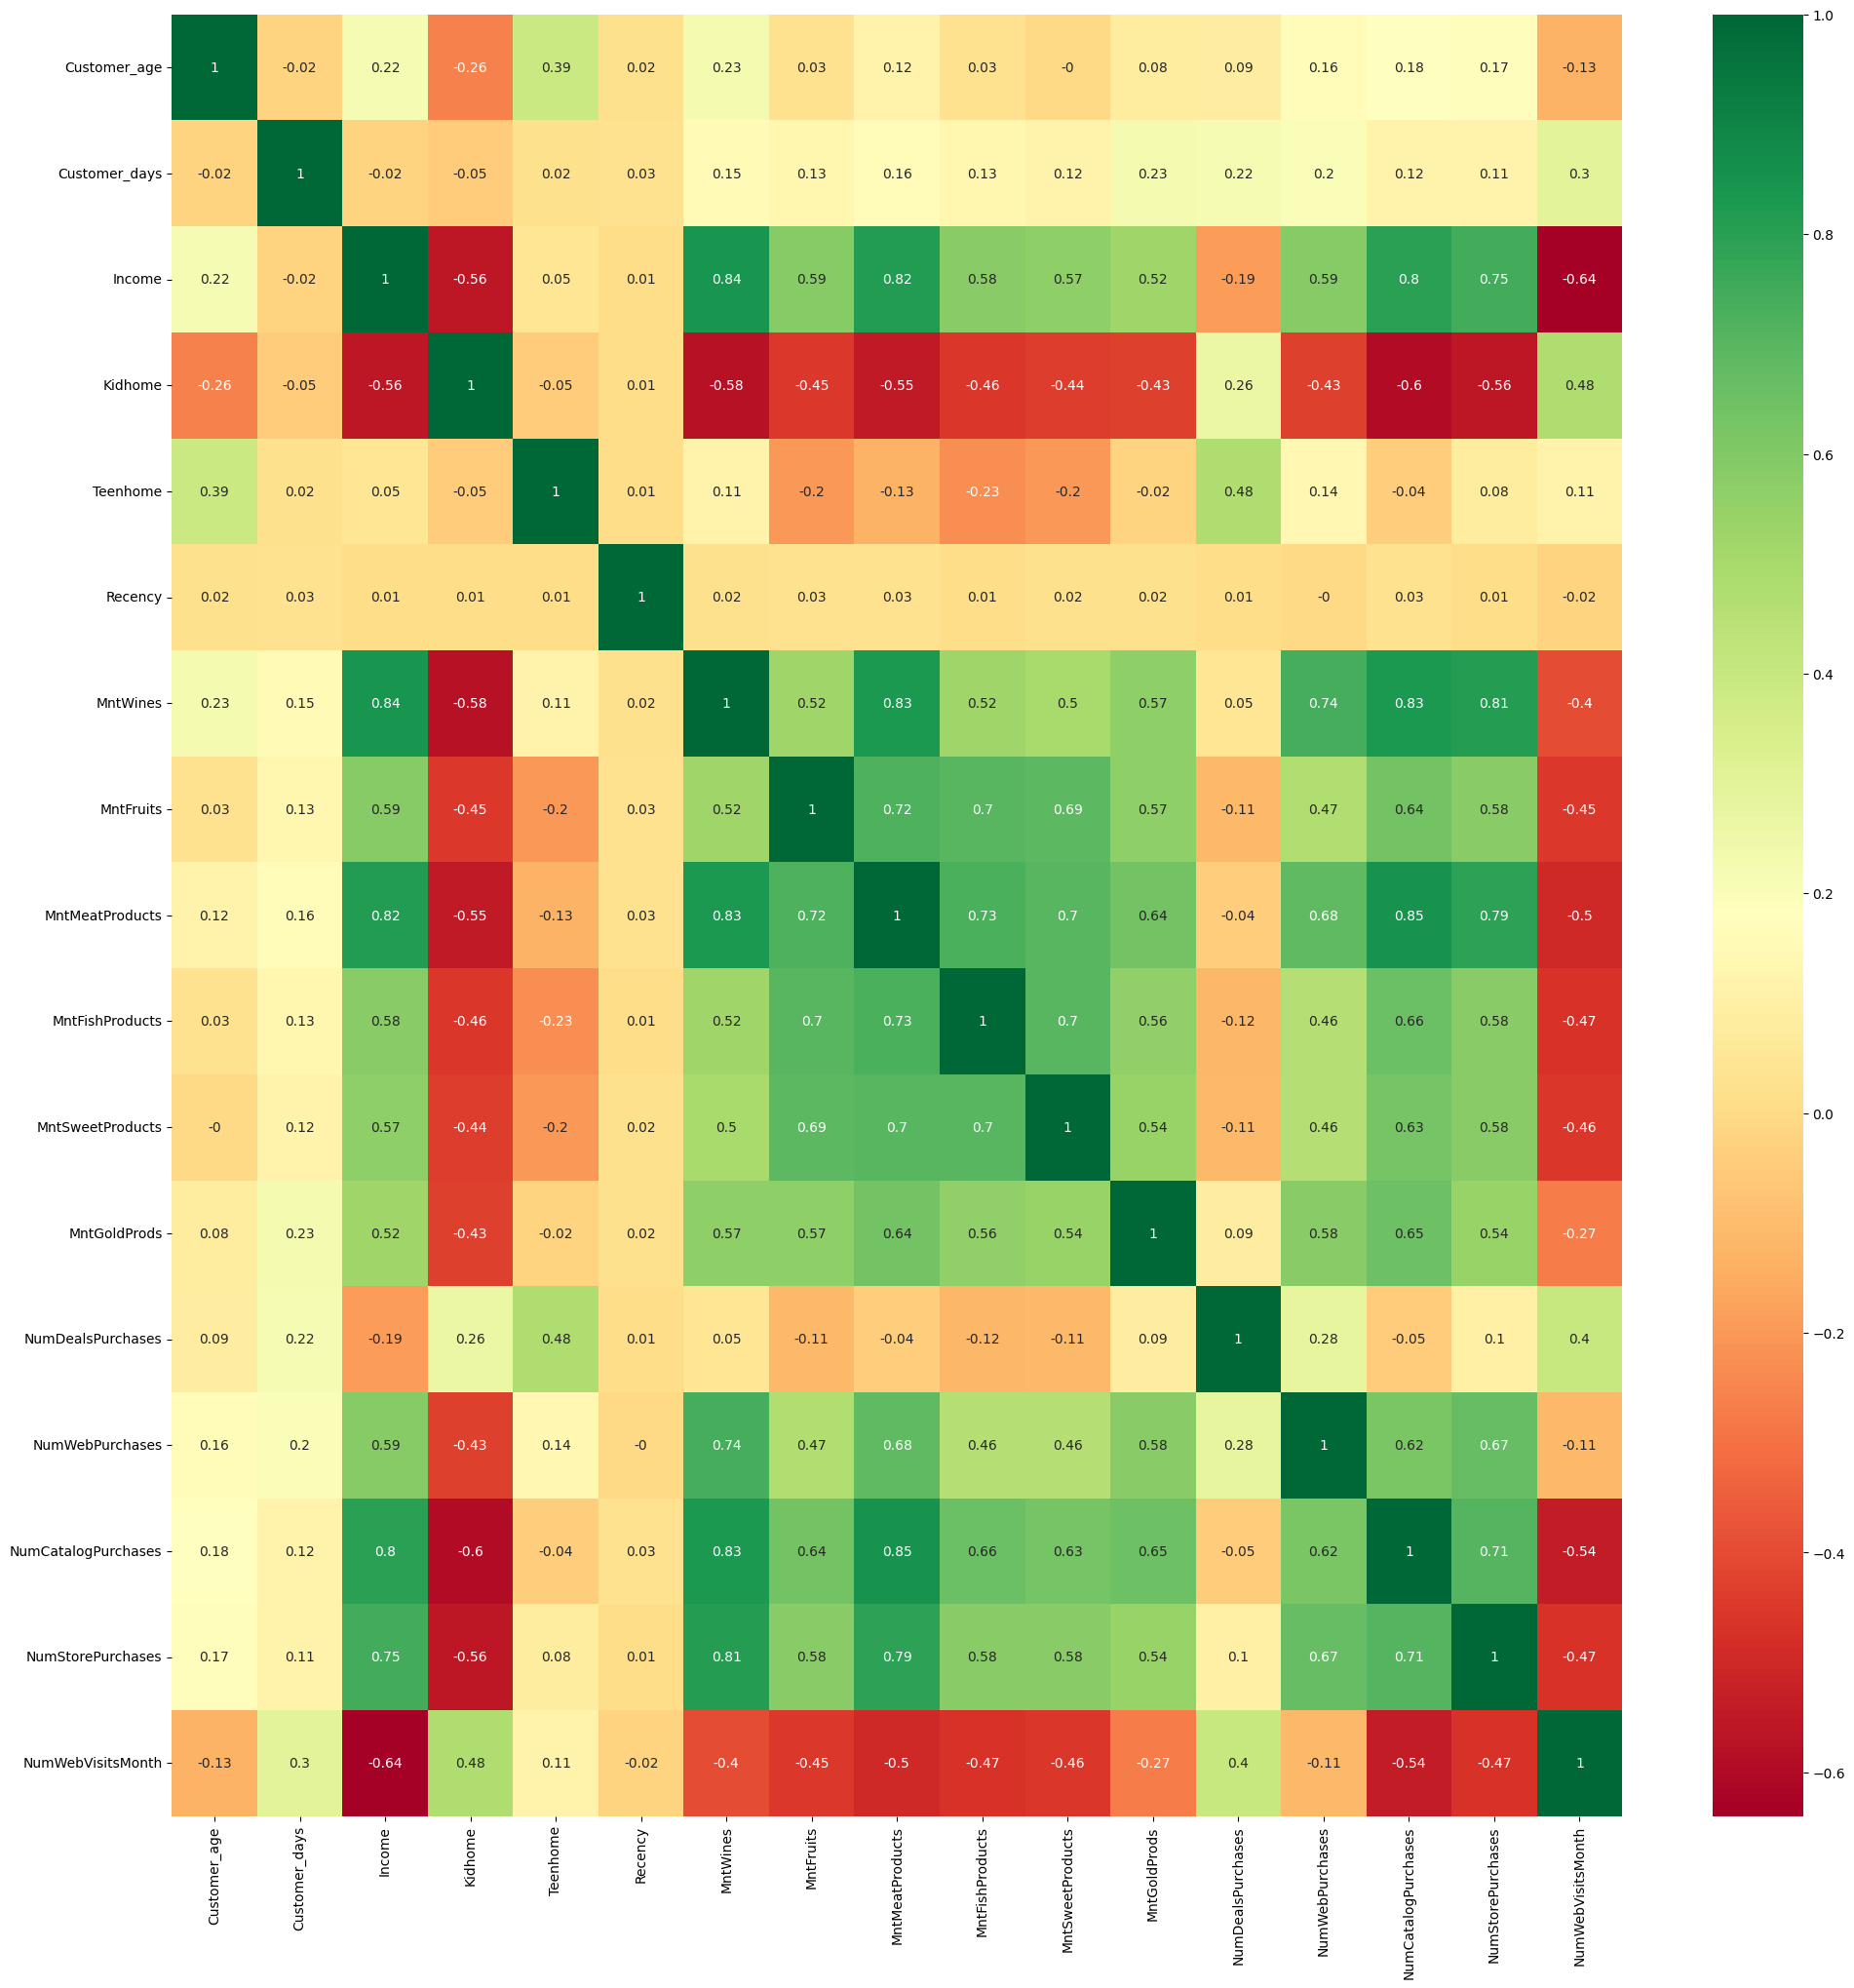

In [15]:
plt.figure(figsize=(24, 24))
sns.heatmap(data=corr, annot=True,cmap='RdYlGn') # RdYlGn, coolwarm
plt.show()

##### Display the correlations in a 2-D Dataframe (threshold value = 0.5 or -0.5)

In [19]:
# create a mask for the upper triangle
mask = corr.mask(np.triu(np.ones_like(corr, dtype=np.bool)))

# flatten the masked triangle and sort values
corr_unstacked = mask.unstack().sort_values(ascending=False)

In [20]:
# positive correlations that meet the threshold > 0.5
positive_corr = corr_unstacked[abs(corr_unstacked > 0.5)]  # filter values with correlation > 0.5

# Convert to flat DataFrame
positive_corr_df = positive_corr.reset_index()
positive_corr_df.columns = ['Feature_1', 'Feature_2', 'Correlation'] 

#sort 
positive_corr_df = positive_corr_df.sort_values(by=['Feature_1','Correlation'], ascending=False)

print(positive_corr_df)
print('Average of Correlations above The 0.5 Threshold\n',positive_corr_df.Correlation.mean())

              Feature_1            Feature_2  Correlation
18      NumWebPurchases    NumStorePurchases         0.67
24      NumWebPurchases  NumCatalogPurchases         0.62
12  NumCatalogPurchases    NumStorePurchases         0.71
2              MntWines  NumCatalogPurchases         0.83
3              MntWines      MntMeatProducts         0.83
5              MntWines    NumStorePurchases         0.81
9              MntWines      NumWebPurchases         0.74
32             MntWines         MntGoldProds         0.57
38             MntWines            MntFruits         0.52
39             MntWines      MntFishProducts         0.52
23     MntSweetProducts  NumCatalogPurchases         0.63
28     MntSweetProducts    NumStorePurchases         0.58
37     MntSweetProducts         MntGoldProds         0.54
0       MntMeatProducts  NumCatalogPurchases         0.85
7       MntMeatProducts    NumStorePurchases         0.79
10      MntMeatProducts      MntFishProducts         0.73
13      MntMea

- Income is highly correlated with the amount spent on the various product categories and the points of purchase (this may indicate that income levels strongly influence a customers purchasing power)
- There is a high positive correlation among  the various product categories which suggests that most customers actively shop for all products at the same time 

In [21]:
# negative correlations that meet the threshold > -0.5
negative_corr = corr_unstacked[abs(corr_unstacked < -0.5)]  

# Convert to flat DataFrame
negative_corr_df = negative_corr.reset_index()

# rename columns
negative_corr_df.columns = ['Feature_1', 'Feature_2', 'Correlation'] 

#sort by feature and correlation
negative_corr_df = negative_corr_df.sort_values(by=['Feature_1','Correlation'], ascending=False)

print(negative_corr_df)

             Feature_1            Feature_2  Correlation
0  NumCatalogPurchases    NumWebVisitsMonth        -0.54
1              Kidhome      MntMeatProducts        -0.55
3              Kidhome    NumStorePurchases        -0.56
4              Kidhome             MntWines        -0.58
5              Kidhome  NumCatalogPurchases        -0.60
2               Income              Kidhome        -0.56
6               Income    NumWebVisitsMonth        -0.64


#### Overall Correlation Results
Question to answer: is there a relationship between a customers profile and their purchasing characteristics?

-  **Income** of the Customers stands out as a mojor influence on the **customers purchasing habits** i.e. it influences the amount they spend to shop on the different product categories. 

    Income has a negative correlation to KidHome as well as Number of web visitsmonth

- Kidhome has high negative correlations with [MntMeatProducts, NumStorePurchases, MntWines, NumCatalogPurchases], this shows that the number of kids at home has a great effect on a customer's purchasing choices 

In [22]:
df.Marital_Status.unique()

['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']
Categories (8, object): ['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow', 'YOLO']

In [23]:
# convert the 'Absurd', 'Alone' 'YOLO' categories to 'Single'
cat_replace = ['Absurd', 'Alone', 'YOLO']
df.Marital_Status.replace(cat_replace, 'Single', regex=True, inplace=True)
df.Marital_Status.unique()

['Single', 'Together', 'Married', 'Divorced', 'Widow']
Categories (5, object): ['Divorced', 'Married', 'Single', 'Together', 'Widow']

In [24]:
ed_count = df.Education.value_counts().to_frame()
print('Education categories count\n',ed_count)

status_counts = df.Marital_Status.value_counts().to_frame()
print('Marital_Status categories count\n',status_counts)

Education categories count
             count
Education        
Graduation   1124
PhD           482
Master        369
2n Cycle      203
Basic          54
Marital_Status categories count
                 count
Marital_Status       
Married           861
Together          576
Single            487
Divorced          231
Widow              77


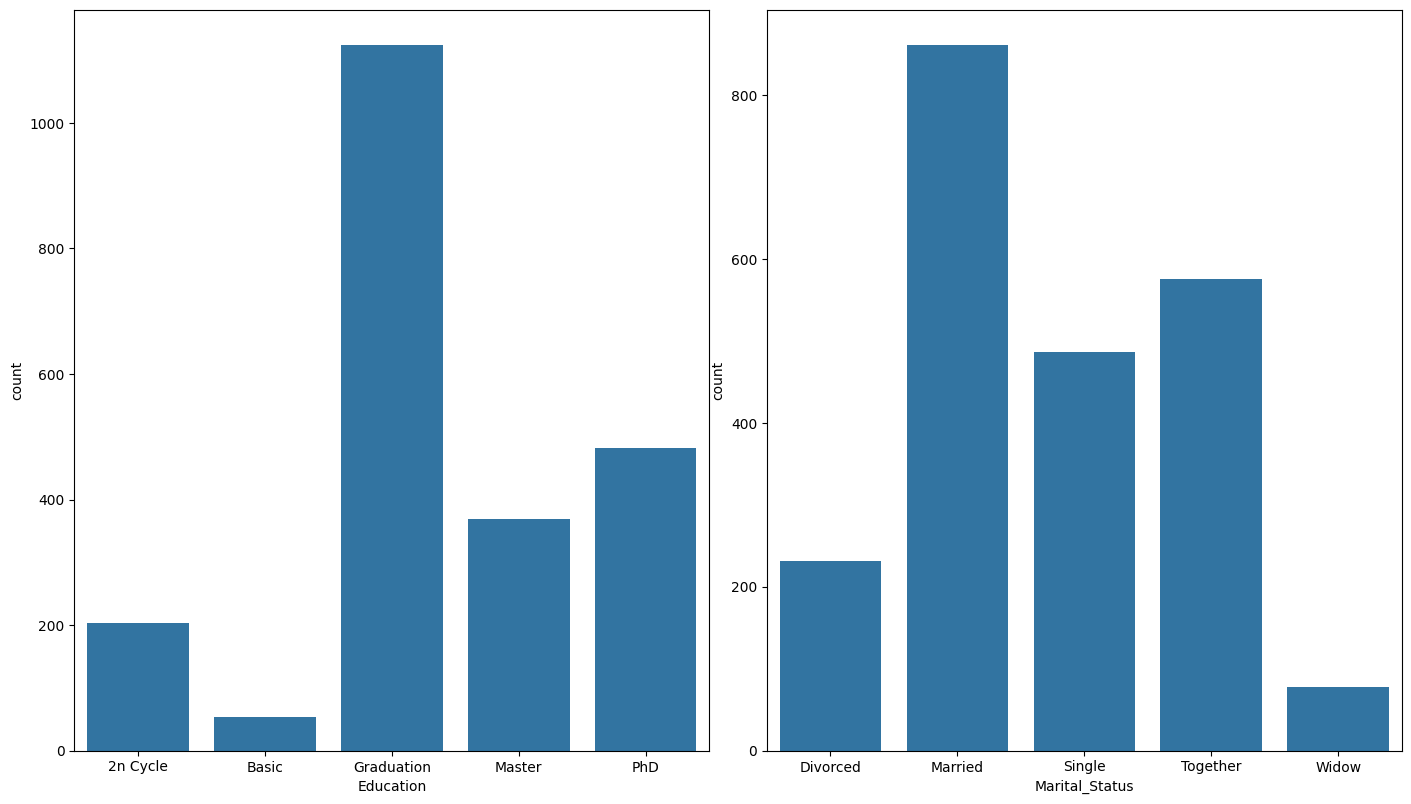

In [22]:
# Categorical value analysis
cat_cols = ['Education', 'Marital_Status']
fig, axs = plt.subplots(1, 2, figsize=(14, 8))
axs= axs.flatten()
fig.tight_layout()

for index, col in enumerate(cat_cols):
    if index < len(cat_cols):
        sns.countplot(data=df, x=col, ax=axs[index])
    
    else:
        break
plt.show()

- Customers with Graduate education form the highest customer base then PhD customers followed by Masters customers
- Married customers form the highest customer base followed by customers that are together then the single ones 

**Insights:** the marketing campaigns need to be geared towards influencing the educated demographic of customers


In [25]:
# Education & Marital_status crosstabulation 
ed_status = pd.crosstab(index=df.Education, columns=df.Marital_Status)
ed_status

Marital_Status,Divorced,Married,Single,Together,Widow
Education,,,,,
2n Cycle,23,81,37,57,5
Basic,1,20,18,14,1
Graduation,118,433,254,284,35
Master,37,138,77,105,12
PhD,52,189,101,116,24


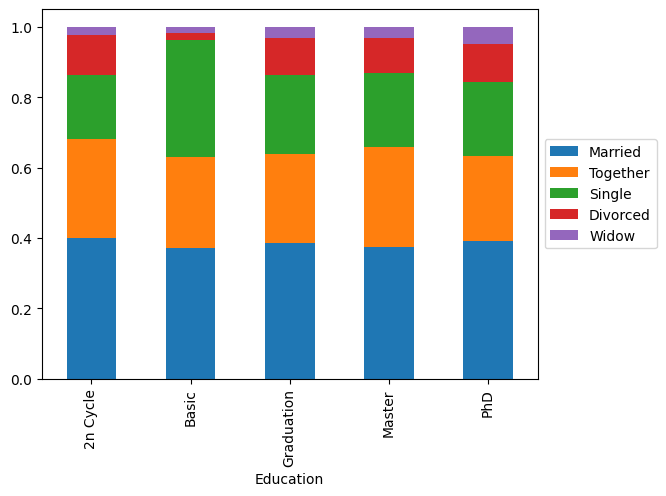

In [28]:
# re order the columns from the largest to smallest category
cols_order = ['Married', 'Together','Single','Divorced','Widow']
ed_status = ed_status.reindex(columns=cols_order)

# calculate the proportions and plot a bar plot
ed_status.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


- is there a relationship between the campaign acceptance and the customers profiles(income, kidathome)
- is there a relationship between a customers purchasing characteristics and the acceptance to marketing campaings?

In [ ]:
# create an age group column
print('Min Customer age:', min(df.Customer_age))
bins = 20 -29, 30 - 39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99, 100-109, 110-119, 120-129

df['Age_group'] = pd.cut(df.Customer_age, bins= )

24


In [32]:
# Campaigns Accepted
ifood_df = df.copy()
ifood_df['AcceptedCmpOverall'] = ifood_df.loc[:,['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
ifood_df

,ID,Customer_age,Customer_days,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,AcceptedCmpOverall
0,5524,63,4716,Graduation,Single,58138.0,0,0,58,635,...,4,7,0,0,0,0,0,0,1,0
1,2174,66,4166,Graduation,Single,46344.0,1,1,38,11,...,2,5,0,0,0,0,0,0,0,0
2,4141,55,4365,Graduation,Together,71613.0,0,0,26,426,...,10,4,0,0,0,0,0,0,0,0
3,6182,36,4192,Graduation,Together,26646.0,1,0,26,11,...,4,6,0,0,0,0,0,0,0,0
4,5324,39,4214,PhD,Married,58293.0,1,0,94,173,...,6,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,53,4434,Graduation,Married,61223.0,0,1,46,709,...,4,5,0,0,0,0,0,0,0,0
2236,4001,74,4072,PhD,Together,64014.0,2,1,56,406,...,5,7,1,0,0,0,0,0,0,1
2237,7270,39,4208,Graduation,Divorced,56981.0,0,0,91,908,...,13,6,0,0,0,1,0,0,0,1
2238,8235,64,4209,Master,Together,69245.0,0,1,8,428,...,10,3,0,0,0,0,0,0,0,0


In [33]:
ifood_df.AcceptedCmpOverall.value_counts().to_frame()

,count
AcceptedCmpOverall,
0,1769
1,325
2,83
3,44
4,11


In [ ]:
ct = pd.crosstab(df.Marital_Status, df.Response, normalize=True)*100
ct

Response,0,1
Marital_Status,,
Absurd,0.044803,0.044803
Alone,0.089606,0.044803
Divorced,8.198925,2.150538
Married,34.184588,4.390681
Single,16.756272,4.749104
Together,23.118280,2.688172
Widow,2.598566,0.851254
YOLO,0.044803,0.044803


### create age groups for the data and estimate the impact of the marketing campaigns on them
- average income per age group

In [ ]:
pd.crosstab(df['Education'],
            df['AcceptedCmp1'], normalize=True, margins=True, margins_name="Total"
            )*100

AcceptedCmp1,0,1,All
Education,,,
2n Cycle,8.467742,0.627240,9.094982
Basic,2.419355,0.000000,2.419355
Graduation,46.684588,3.673835,50.358423
Master,15.725806,0.806452,16.532258
PhD,20.250896,1.344086,21.594982
All,93.548387,6.451613,100.000000


In [144]:
df.pivot_table(index= "Education", columns = 'Marital_Status', values = 'AcceptedCmp1', aggfunc = "sum")

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,0,0,1,8,3,1,1,0
Basic,0,0,0,0,0,0,0,0
Graduation,1,0,9,33,13,24,2,0
Master,0,0,1,9,4,2,2,0
PhD,0,0,1,13,11,5,0,0


In [39]:
pd.options.display.float_format = '{:.1f}%'.format
ed = df['Education'].value_counts(normalize=True)*100
ed

Education
Graduation   50.3%
PhD          21.7%
Master       16.5%
2n Cycle      9.1%
Basic         2.4%
Name: proportion, dtype: float64

In [38]:
pd.crosstab(df['Education'],
            df['Marital_Status'], normalize=True
            )*100

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,0.000000,0.000000,1.026786,3.616071,1.651786,2.544643,0.223214,0.000000
Basic,0.000000,0.000000,0.044643,0.892857,0.803571,0.625000,0.044643,0.000000
Graduation,0.044643,0.044643,5.312500,19.330357,11.250000,12.767857,1.562500,0.000000
Master,0.044643,0.044643,1.651786,6.160714,3.348214,4.732143,0.535714,0.000000
PhD,0.000000,0.044643,2.321429,8.571429,4.375000,5.223214,1.071429,0.089286


<Axes: xlabel='Marital_Status', ylabel='Education'>

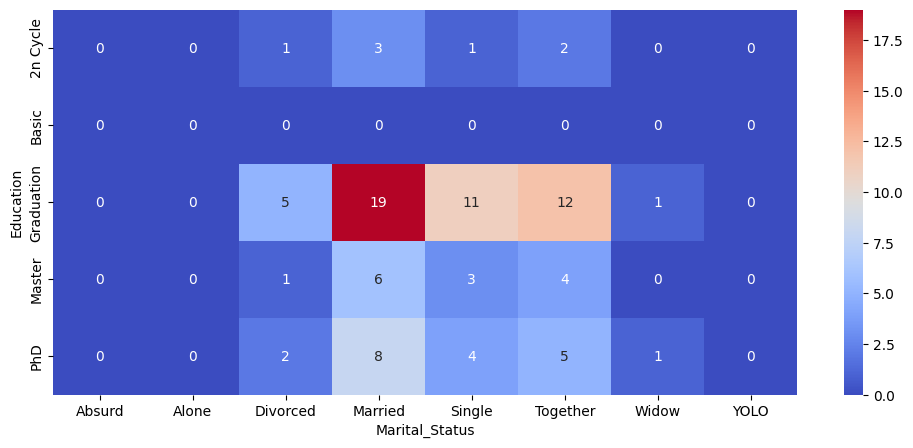

In [55]:
plt.figure(figsize=(12,5))
sns.heatmap((pd.crosstab(df['Education'],
            df['Marital_Status'], normalize=True
            )*100).astype('int'), annot=True, fmt="d", cmap='coolwarm')

calculate the age groups for the data
of the customers that complained[1], proportions according to the education level, marital status
